In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
model = models.Sequential()
# En Conv2D recomendado usar multiplos de 2
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
# A la segunda convolucion ya no hace falta ponerle el input_shape
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
# Aplanar la capa
model.add(layers.Flatten())
# Ahora meter alguna densa
model.add(layers.Dense(64,activation="relu"))
# Capa de salida
model.add(layers.Dense(10,activation="softmax"))

model.summary()

c:\Users\oscar.torresrodrigue\AppData\Local\miniconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [21]:
# Modelo adam, mas utilizado y recomendado
from keras.optimizers import Adam

adam = Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",optimizer=adam ,metrics=["accuracy"])

In [22]:
epochs = 1000

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])

Epoch 1/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7643 - loss: 0.6516 - val_accuracy: 0.8654 - val_loss: 0.3800
Epoch 2/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8797 - loss: 0.3337 - val_accuracy: 0.8892 - val_loss: 0.3081
Epoch 3/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8975 - loss: 0.2812 - val_accuracy: 0.9012 - val_loss: 0.2723
Epoch 4/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9070 - loss: 0.2492 - val_accuracy: 0.8990 - val_loss: 0.2637
Epoch 5/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9218 - loss: 0.2151 - val_accuracy: 0.9058 - val_loss: 0.2553
Epoch 6/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9296 - loss: 0.1902 - val_accuracy: 0.9142 - val_loss: 0.2344
Epoch 7/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9354 - loss: 0.1730 - val_accuracy: 0.9094 - val_loss: 0.2561
Epoch 8/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9407 -

<Axes: >

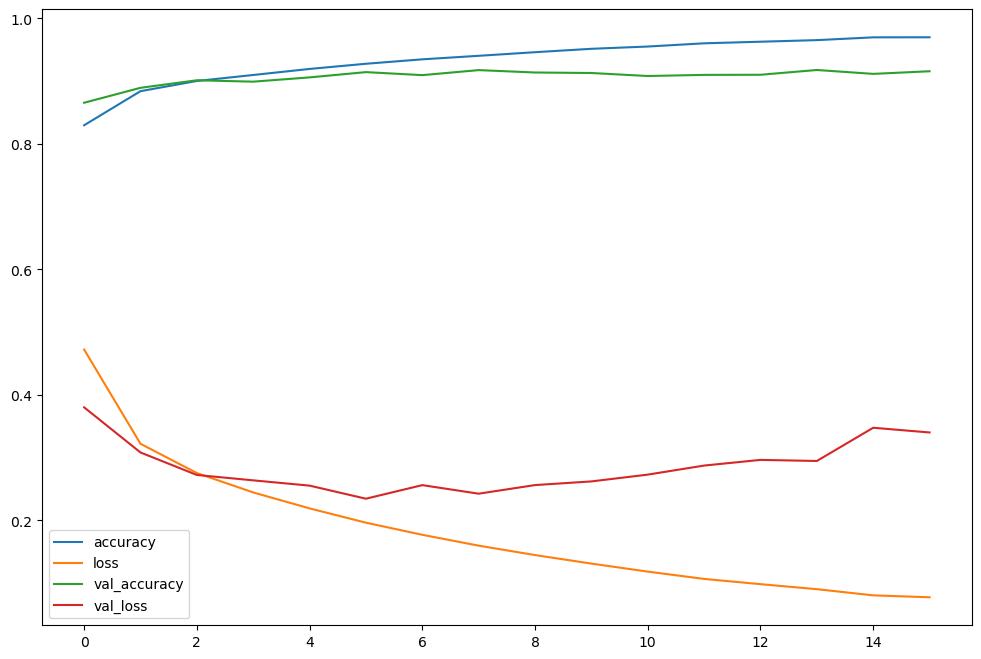

In [24]:
pd.DataFrame(history.history).plot(figsize=(12,8))

In [30]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9124 - loss: 0.2577


[0.25551679730415344, 0.9103000164031982]

In [25]:
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true_labels = y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


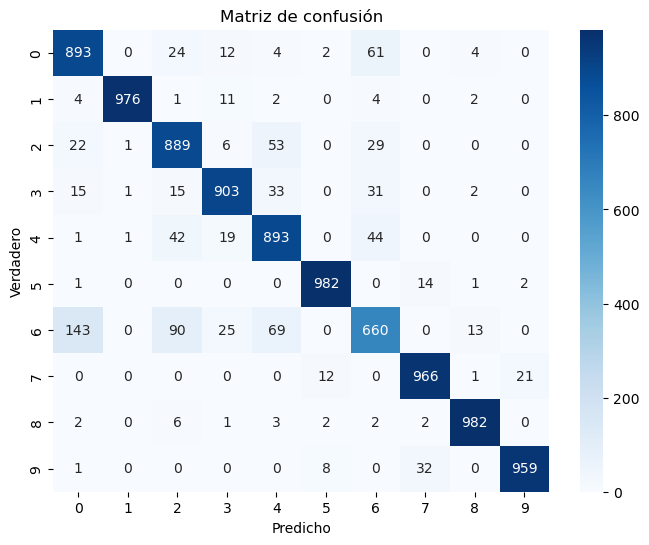

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_true_labels, y_test_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de confusión')
plt.show()

In [27]:
from sklearn.metrics import classification_report

report = classification_report(y_test_true_labels, y_test_pred_labels, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8253    0.8930    0.8578      1000
           1     0.9969    0.9760    0.9864      1000
           2     0.8332    0.8890    0.8602      1000
           3     0.9243    0.9030    0.9135      1000
           4     0.8448    0.8930    0.8683      1000
           5     0.9761    0.9820    0.9791      1000
           6     0.7942    0.6600    0.7209      1000
           7     0.9527    0.9660    0.9593      1000
           8     0.9771    0.9820    0.9796      1000
           9     0.9766    0.9590    0.9677      1000

    accuracy                         0.9103     10000
   macro avg     0.9101    0.9103    0.9093     10000
weighted avg     0.9101    0.9103    0.9093     10000

